In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(42)

df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


## Test impact on CTR from implemented changes on the landing page

### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [2]:
# total number of actions
df.groupby(['action']).count()

,timestamp,id,group
action,,,
click,1860,1860,1860
view,6328,6328,6328


In [3]:
df['action'].count()

8188

In [4]:
# number of unique users
df['id'].nunique()

6328

In [5]:
# size of control group and experiment group
df[df['group'] == 'experiment']['id'].nunique()

2996

In [6]:
df[df['group'] == 'control']['id'].nunique()

3332

### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [7]:
# duration of this experiment
pd.to_datetime(df['timestamp'].max()) - pd.to_datetime(df['timestamp'].min())

Timedelta('115 days 16:41:40.789831')

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [8]:
# action types in this experiment
df.groupby(['action']).count()

,timestamp,id,group
action,,,
click,1860,1860,1860
view,6328,6328,6328


### 4. Define the click through rate (CTR) for this experiment.

CRT = unique clicks / unique views

In [9]:
u_clicks = df[df['action'] == 'click']['id'].nunique()
u_clicks

1860

In [10]:
u_views = df[df['action'] == 'view']['id'].nunique()
u_views

6328

In [11]:
u_clicks/u_views

0.2939317319848293

### 5. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.


$$H_0: CTR_{old} >= CTR_{new}$$    
$$H_1: CTR_{old} < CTR_{new}$$

OR

$$H_0: (CTR_{old} - CTR_{new}) >= 0$$
$$H_1: (CTR_{old} - CTR_{new}) < 0$$

### 6. Comparing performance for the two groups

In [12]:
control_df = df[df['group'] == 'control']
exp_df = df[df['group'] == 'experiment']

In [13]:
con_cl = control_df[control_df['action'] == 'click']['id'].nunique()
con_view = control_df[control_df['action'] == 'view']['id'].nunique()
con_crt = con_cl/con_view
con_crt

0.2797118847539016

In [14]:
exp_cl = exp_df[exp_df['action'] == 'click']['id'].nunique()
exp_view = exp_df[exp_df['action'] == 'view']['id'].nunique()
exp_crt = exp_cl/exp_view
exp_crt

0.3097463284379172

In [15]:
obs_diff = con_crt - exp_crt
obs_diff

-0.030034443684015644

#### Bootstrap sampling distribution

In [16]:
df.shape[0]

8188

In [17]:
diff_dist = []
for i in range(10000):
    samp = df.sample(df.shape[0], replace = True)
    control_df = samp[samp['group'] == 'control']
    exp_df = samp[samp['group'] == 'experiment']
    con_cl = control_df[control_df['action'] == 'click']['id'].nunique()
    con_view = control_df[control_df['action'] == 'view']['id'].nunique()
    con_crt = con_cl/con_view
    exp_cl = exp_df[exp_df['action'] == 'click']['id'].nunique()
    exp_view = exp_df[exp_df['action'] == 'view']['id'].nunique()
    exp_crt = exp_cl/exp_view
    crt_diff = con_crt - exp_crt
    diff_dist.append(crt_diff)

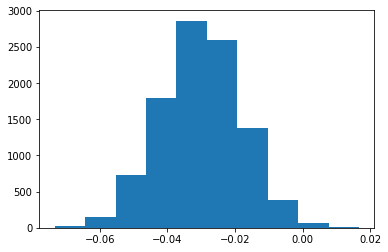

In [18]:
plt.hist(diff_dist);

#### Simulate normal distribution around null hypothesis value with standard deviation of sampling distribution

In [19]:
diff_dist = np.array(diff_dist)
null_vals = np.random.normal(0, diff_dist.std(), diff_dist.size)

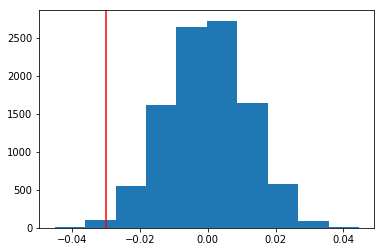

In [20]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red');

#### Calculate P value

In [21]:
(null_vals < obs_diff).mean()

0.0061

#### Result: Reject the null hyphotesis (as P value << 0.01) 
--> it does not look like the observed CRT difference (statistic) is from the null distribution

## Test impact on CTR (course enrollment) from implemented changes on the course page

Hypothesis:

$$H_0: (CTR_{old} - CTR_{new}) >= 0$$
$$H_1: (CTR_{old} - CTR_{new}) < 0$$

In [22]:
df_course = pd.read_csv('course_page_actions.csv')
df_course.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [23]:
control_df = df_course[df_course['group'] == 'control']
exp_df = df_course[df_course['group'] == 'experiment']

In [24]:
con_cl = control_df[control_df['action'] == 'enroll']['id'].nunique()
con_view = control_df[control_df['action'] == 'view']['id'].nunique()
con_crt = con_cl/con_view
con_crt

0.2364438839848676

In [25]:
exp_cl = exp_df[exp_df['action'] == 'enroll']['id'].nunique()
exp_view = exp_df[exp_df['action'] == 'view']['id'].nunique()
exp_crt = exp_cl/exp_view
exp_crt

0.2668693009118541

In [26]:
obs_diff = con_crt - exp_crt
obs_diff

-0.030425416926986526

#### Bootstrap sampling distribution

In [27]:
df_course.shape[0]

4074

In [28]:
diff_dist = []
for i in range(10000):
    samp = df_course.sample(df_course.shape[0], replace = True)
    control_df = samp[samp['group'] == 'control']
    exp_df = samp[samp['group'] == 'experiment']
    con_cl = control_df[control_df['action'] == 'enroll']['id'].nunique()
    con_view = control_df[control_df['action'] == 'view']['id'].nunique()
    con_crt = con_cl/con_view
    exp_cl = exp_df[exp_df['action'] == 'enroll']['id'].nunique()
    exp_view = exp_df[exp_df['action'] == 'view']['id'].nunique()
    exp_crt = exp_cl/exp_view
    crt_diff = con_crt - exp_crt
    diff_dist.append(crt_diff)

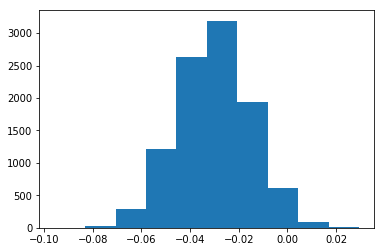

In [29]:
plt.hist(diff_dist);

#### Simulate normal distribution around null hypothesis value with standard deviation of sampling distribution

In [30]:
diff_dist = np.array(diff_dist)
null_vals = np.random.normal(0, diff_dist.std(), diff_dist.size)

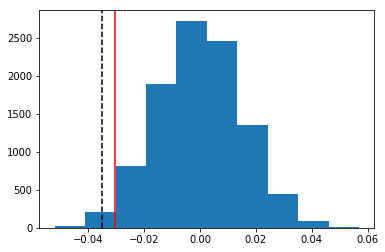

In [31]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')
plt.axvline(x=np.percentile(null_vals, 1), color='black', ls='dashed');

#### Calculate P value

In [32]:
(null_vals < obs_diff).mean()

0.023

#### Result: Fail to reject the null hyphotesis (as P value > 0.01) 
--> the observed CRT difference (statistic) may be from the null distribution

## Test impact on time spent in class from implemented changes on the course page

Hypothesis:

$$H_0: (\mu_{old} - \mu_{new}) >= 0$$
$$H_1: (\mu_{old} - \mu_{new}) < 0$$

In [33]:
df_class = pd.read_csv('classroom_actions.csv')
df_class.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [34]:
df_avr_class = df_class.groupby(['id','group'])['total_days'].mean()
df_avr_class = df_avr_class.reset_index() 
df_avr_class.head()

,id,group,total_days
0,182951,control,52
1,182958,experiment,80
2,182998,experiment,48
3,183035,control,56
4,183148,control,74


In [35]:
print(df_class.shape, df_avr_class.shape)  

(3829, 5) (3829, 3)


In [36]:
#actually turns out grouping by ID, group in order to average total_days for users who are appear more than once 
#was not necessary

In [37]:
control_df = df_class[df_class['group'] == 'control']
exp_df = df_class[df_class['group'] == 'experiment']

In [38]:
meantime_ctr = control_df['total_days'].mean()
meantime_ctr

73.36899038461539

In [39]:
meantime_exp = exp_df['total_days'].mean()
meantime_exp

74.6715935334873

In [40]:
obs_diff = meantime_ctr - meantime_exp
obs_diff

-1.3026031488719099

#### Bootstrap sampling distribution

In [41]:
diff_dist = []
for i in range(10000):
    samp = df_class.sample(df_class.shape[0], replace = True)
    control_df = samp[samp['group'] == 'control']
    exp_df = samp[samp['group'] == 'experiment']
    meantime_ctr = control_df['total_days'].mean()
    meantime_exp = exp_df['total_days'].mean()
    mean_diff = meantime_ctr - meantime_exp
    diff_dist.append(mean_diff)

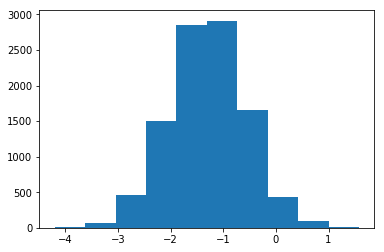

In [42]:
plt.hist(diff_dist);

#### Simulate normal distribution around null hypothesis value with standard deviation of sampling distribution

In [43]:
diff_dist = np.array(diff_dist)
null_vals = np.random.normal(0, diff_dist.std(), diff_dist.size)

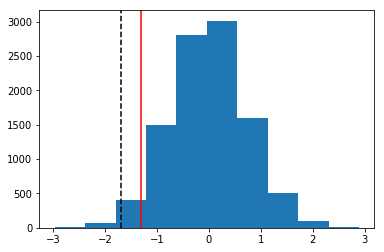

In [44]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')
plt.axvline(x=np.percentile(null_vals, 1), color='black', ls='dashed');

#### Calculate P value

In [45]:
(null_vals < obs_diff).mean()

0.0355

#### Result: Fail to reject the null hyphotesis (as P value > 0.01) 
--> the observed CRT difference (statistic) may be from the null distribution

## Test impact on course completion rate from implemented changes on the course page

Hypothesis:

$$H_0: (CCR_{old} - CCR_{new}) >= 0$$
$$H_1: (CCR_{old} - CCR_{new}) < 0$$

In [46]:
df_class = pd.read_csv('classroom_actions.csv')
df_class.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [47]:
df_avr_class = df_class.groupby(['id','group'])['completed'].mean()
df_avr_class = df_avr_class.reset_index() 
df_avr_class.head()

,id,group,completed
0,182951,control,False
1,182958,experiment,True
2,182998,experiment,False
3,183035,control,False
4,183148,control,True


In [48]:
print(df_class.shape, df_avr_class.shape)

(3829, 5) (3829, 3)


In [49]:
control_df = df_class[df_class['group'] == 'control']
exp_df = df_class[df_class['group'] == 'experiment']

In [50]:
con_comp = control_df[control_df['completed'] == True]['id'].count()
con_enrolled = control_df['id'].count()
con_crt = con_comp/con_enrolled
con_crt

0.3719951923076923

In [51]:
exp_comp = exp_df[exp_df['completed'] == True]['id'].count()
exp_enrolled = exp_df['id'].count()
exp_crt = exp_comp/exp_enrolled
exp_crt

0.3935334872979215

In [52]:
obs_diff = con_crt - exp_crt
obs_diff

-0.02153829499022919

#### Bootstrap sampling distribution

In [53]:
df_class.shape[0]

3829

In [54]:
diff_dist = []
for i in range(10000):
    samp = df_class.sample(df_class.shape[0], replace = True)
    control_df = samp[samp['group'] == 'control']
    exp_df = samp[samp['group'] == 'experiment']
    con_comp = control_df[control_df['completed'] == True]['id'].count()
    con_enrolled = control_df['id'].count()
    con_crt = con_comp/con_enrolled
    exp_comp = exp_df[exp_df['completed'] == True]['id'].count()
    exp_enrolled = exp_df['id'].count()
    exp_crt = exp_comp/exp_enrolled
    crt_diff = con_crt - exp_crt
    diff_dist.append(crt_diff)

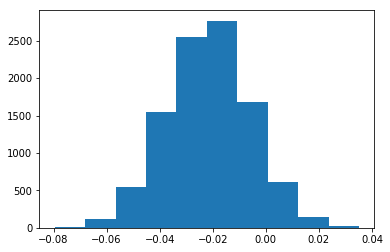

In [55]:
plt.hist(diff_dist);

#### Simulate normal distribution around null hypothesis value with standard deviation of sampling distribution

In [56]:
diff_dist = np.array(diff_dist)
null_vals = np.random.normal(0, diff_dist.std(), diff_dist.size)

In [57]:
diff_dist.mean()

-0.021570238176478535

In [58]:
diff_dist.std()

0.015836307260149944

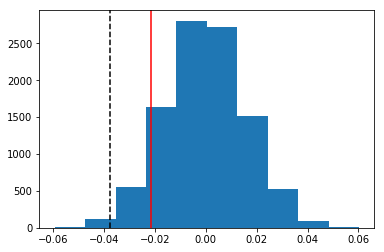

In [59]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')
plt.axvline(x=np.percentile(null_vals, 1), color='black', ls='dashed');

#### Calculate P value

In [60]:
(null_vals < obs_diff).mean()

0.0839

#### Result: Fail to reject the null hyphotesis (as P value > 0.01) 
--> the observed CRT difference (statistic) may be from the null distribution